# Project : Wireless Indoor Localization 
Description : Collected in indoor space by observing signal strengths of seven WiFi signals visible on a smartphone. The decision variable is one of the four rooms.

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets create a dataframe from given csv file
df = pd.read_csv('wireless.csv')


In [3]:
#Lets see the first 5 rows of the data
df.head()

,Wifi1,Wifi2,Wifi3,Wifi4,Wifi5,Wifi6,Wifi7,Room No.
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [4]:
#Lets check the shape of the data
df.shape
# There are 7 features(wifi signals) and 1 Target(room no) and have 2000 rows

(2000, 8)

In [5]:
# Lets check the datatypes
df.dtypes 
#There are all integers

Wifi1       int64
Wifi2       int64
Wifi3       int64
Wifi4       int64
Wifi5       int64
Wifi6       int64
Wifi7       int64
Room No.    int64
dtype: object

In [6]:
# Lets get more information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
Wifi1       2000 non-null int64
Wifi2       2000 non-null int64
Wifi3       2000 non-null int64
Wifi4       2000 non-null int64
Wifi5       2000 non-null int64
Wifi6       2000 non-null int64
Wifi7       2000 non-null int64
Room No.    2000 non-null int64
dtypes: int64(8)
memory usage: 125.1 KB


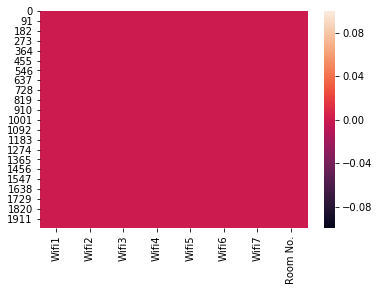

In [7]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
#There are no missing values lets confirm it the other way

In [8]:
# Lets confirm about missing value once more
df.isnull().sum()
#hence we are sure there are no missing values

Wifi1       0
Wifi2       0
Wifi3       0
Wifi4       0
Wifi5       0
Wifi6       0
Wifi7       0
Room No.    0
dtype: int64

In [9]:
# Lets see the descriptive statistics
df.describe()

,Wifi1,Wifi2,Wifi3,Wifi4,Wifi5,Wifi6,Wifi7,Room No.
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [10]:
#Lets see the correlation among the different features as well as with target
df.corr()


,Wifi1,Wifi2,Wifi3,Wifi4,Wifi5,Wifi6,Wifi7,Room No.
Wifi1,1.000000,-0.003298,0.050814,0.921025,-0.244932,0.718429,0.686955,-0.058061
Wifi2,-0.003298,1.000000,0.282211,0.014604,0.200469,0.074002,0.048336,0.143254
Wifi3,0.050814,0.282211,1.000000,0.078292,0.618984,-0.091622,-0.073141,0.688467
Wifi4,0.921025,0.014604,0.078292,1.000000,-0.236021,0.706039,0.673294,-0.039363
Wifi5,-0.244932,0.200469,0.618984,-0.236021,1.000000,-0.416049,-0.361621,0.820530
Wifi6,0.718429,0.074002,-0.091622,0.706039,-0.416049,1.000000,0.723172,-0.360171
Wifi7,0.686955,0.048336,-0.073141,0.673294,-0.361621,0.723172,1.000000,-0.305075
Room No.,-0.058061,0.143254,0.688467,-0.039363,0.820530,-0.360171,-0.305075,1.000000


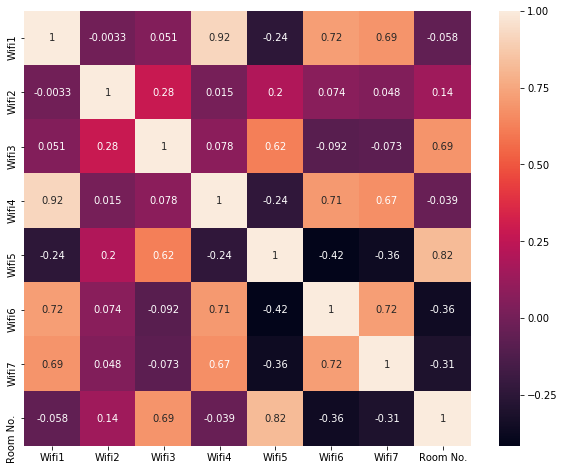

In [11]:
# lets visualize the correlation with heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
#room no has positive correlation with few variables and negative with some others
#wifi1 and wifi4 has strong correlation with each other(0.92)
#room no has highest correlation with wifi5(82.05)

Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001DCBD3E748>,
      dtype=object)

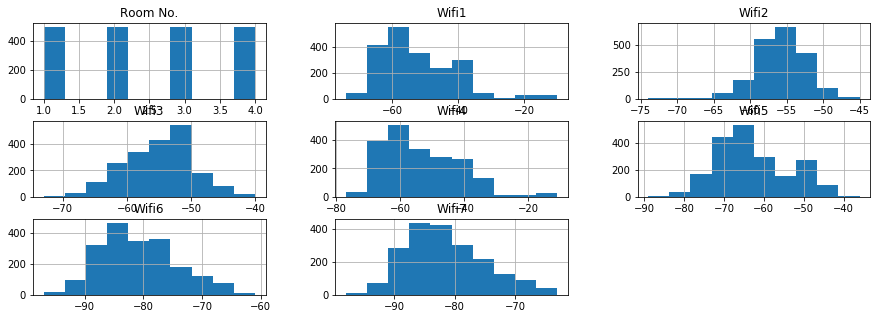

In [12]:
#Lets visualize distribution of  numeric data

         
df.hist(figsize=(15,5))


In [13]:
#Lets see the room no
df['Room No.'].value_counts()
#We can see that data set is balanced

4    500
3    500
2    500
1    500
Name: Room No., dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001DCC49FBA8>,
      dtype=object)

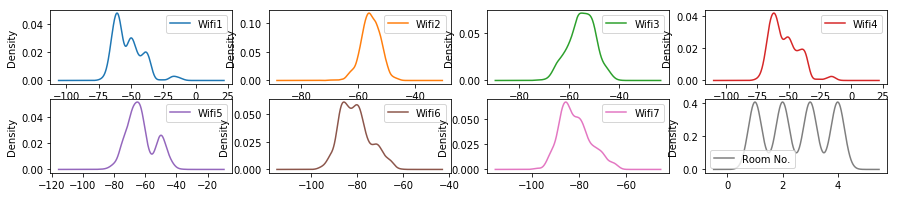

In [14]:
# # Univariate Density Plots of all numeric variables
df.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize=(15,3))



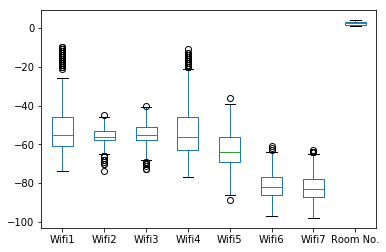

In [15]:
#Lets plot the box plot of each numeric variable
df.plot.box()


Bivariate Analyis

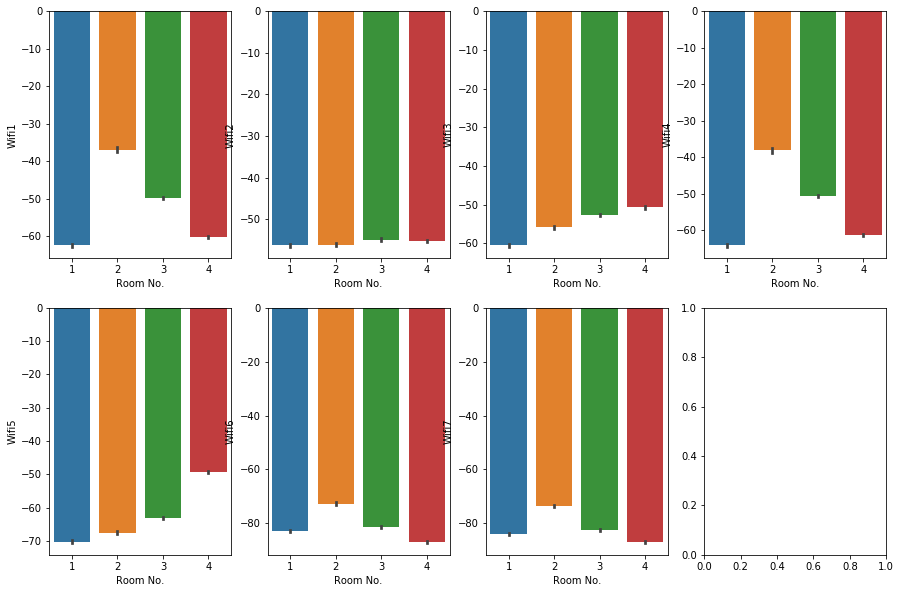

In [16]:
#Lets see the relationship of Room No with wifi signals
f,axes= plt.subplots(2,4, figsize=(15,10))
sns.barplot(x='Room No.', y ='Wifi1', data=df,ax=axes[0,0])
sns.barplot(x='Room No.', y ='Wifi2', data=df, ax=axes[0,1])
sns.barplot(x='Room No.', y ='Wifi3', data=df, ax=axes[0,2])
sns.barplot(x='Room No.', y ='Wifi4', data=df, ax=axes[0,3])
sns.barplot(x='Room No.', y ='Wifi5', data=df, ax=axes[1,0])
sns.barplot(x='Room No.', y ='Wifi6', data=df, ax=axes[1,1])
sns.barplot(x='Room No.', y ='Wifi7', data=df, ax=axes[1,2])


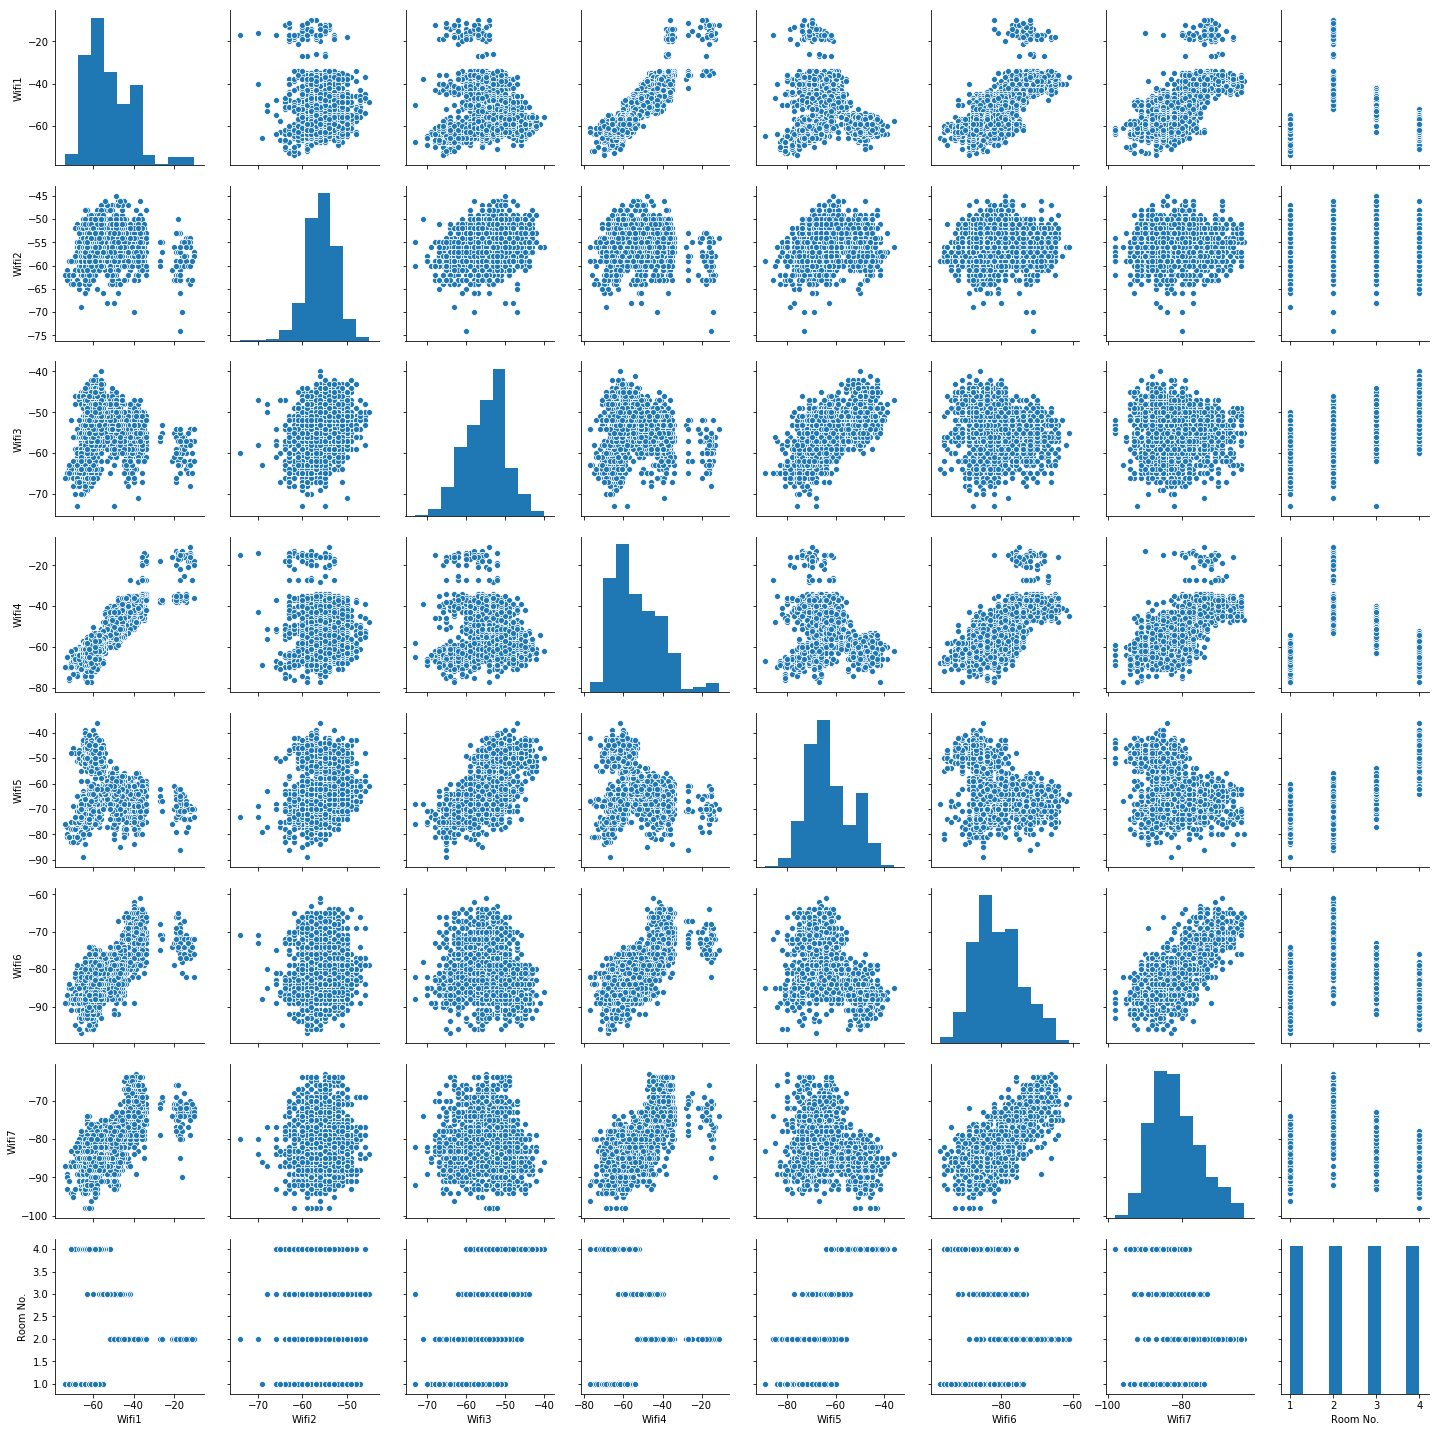

In [17]:
#Lets  see the realtion among all variables
sns.pairplot(df)

In [18]:
#Lets check the skewness 
df.skew()
#There is positve skewness beyond acceptable range in wifi1 and wifi4

Wifi1       1.060596
Wifi2      -0.290123
Wifi3      -0.213550
Wifi4       0.854540
Wifi5       0.392078
Wifi6       0.456384
Wifi7       0.502991
Room No.    0.000000
dtype: float64

In [19]:
#Lets create a copy of dataset
dft = df.copy()

In [20]:
#Lets try to reduce the skewness 
for col in dft.columns:                                      
    if dft.skew().loc[col]>0.55:
        dft[col]=np.log1p(dft[col]+28)

In [21]:
#Lets check the skewness
dft.skew()

Wifi1      -2.367264
Wifi2      -0.290123
Wifi3      -0.213550
Wifi4      -1.573387
Wifi5       0.392078
Wifi6       0.456384
Wifi7       0.502991
Room No.    0.000000
dtype: float64

In [22]:
#Lets drop wifi1
df.drop('Wifi1',axis=1,inplace=True)


In [23]:
#Lets check the dataframe
df.head()
#wifi1 has been dropped

,Wifi2,Wifi3,Wifi4,Wifi5,Wifi6,Wifi7,Room No.
0,-56,-61,-66,-71,-82,-81,1
1,-57,-61,-65,-71,-85,-85,1
2,-60,-60,-67,-76,-85,-84,1
3,-60,-68,-62,-77,-90,-80,1
4,-65,-60,-63,-77,-81,-87,1


In [24]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(df))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which have been removed

The shape of original dataframe was = (2000, 7)
The shape of dataframe after removing outliers is = (1949, 7)


In [25]:
# Let us seperate the features and Target
x=dfx.drop(['Room No.'],axis=1)    
y=dfx[['Room No.']]

In [26]:
#Lets check the shape of x
x.shape

(1949, 6)

In [27]:
#Lets check the shape of y
y.shape

(1949, 1)

In [28]:
#Lets check the first five rows of x
x.head()

,Wifi2,Wifi3,Wifi4,Wifi5,Wifi6,Wifi7
0,-56,-61,-66,-71,-82,-81
1,-57,-61,-65,-71,-85,-85
2,-60,-60,-67,-76,-85,-84
3,-60,-68,-62,-77,-90,-80
4,-65,-60,-63,-77,-81,-87


In [29]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,Room No.
0,1
1,1
2,1
3,1
4,1


In [30]:
#As it is a classification problem lets import require metrics from  libraries
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [31]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [32]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))




In [33]:
# lets use stratified k fold to represent each class
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True) 

In [34]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
std_dev=[]
for name, model in pipelines: 
    cv_results = cross_val_score(model, x, y, cv=skfold, scoring='accuracy') 
    results.append(cv_results.mean()) 
    names.append(name) 
    std_dev.append(cv_results.std())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.953292 (0.012739)
LDA: 0.964072 (0.010045)
KNN: 0.970729 (0.010352)
DT: 0.945094 (0.008300)
NB: 0.962534 (0.014678)
SVM: 0.970744 (0.013012)


In [35]:
#Lets see the comparison summary
Comparisonc = pd.DataFrame({'ModelName':names,'cross_val_accuracy': results,'std_dev':std_dev})
Comparisonc.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy,std_dev
5,SVM,0.970744,0.013012
2,KNN,0.970729,0.010352
1,LDA,0.964072,0.010045
4,NB,0.962534,0.014678
0,LR,0.953292,0.012739
3,DT,0.945094,0.008300


In [36]:
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostClassifier(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier(random_state=5))])))

In [37]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy

results1 = []
names1 = []
std_dev1=[]

for name, model in pipelines1: 
    cv_results1 = cross_val_score(model, x, y, cv=skfold, scoring='accuracy') 
    results1.append(cv_results1.mean()) 
    names1.append(name)
    std_dev1.append(cv_results1.std())
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)                                              


RF: 0.967181 (0.011453)
ADC: 0.746625 (0.058931)
GBC: 0.968191 (0.012134)


In [38]:
#Lets see the comparison summary of ensemble techniques
Comparisonn = pd.DataFrame({'ModelName':names1,'cross_val_accuracy': results1,'std_dev':std_dev1})
Comparisonn.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy,std_dev
2,GBC,0.968191,0.012134
0,RF,0.967181,0.011453
1,ADC,0.746625,0.058931


In [39]:
#Lets see the final comparison summary of all basic and ensemble techniques used
finalcomparison = pd.concat([Comparisonc,Comparisonn])
finalcomparison.sort_values(by='cross_val_accuracy',ascending =False)

,ModelName,cross_val_accuracy,std_dev
5,SVM,0.970744,0.013012
2,KNN,0.970729,0.010352
2,GBC,0.968191,0.012134
0,RF,0.967181,0.011453
1,LDA,0.964072,0.010045
4,NB,0.962534,0.014678
0,LR,0.953292,0.012739
3,DT,0.945094,0.008300
1,ADC,0.746625,0.058931


In [40]:
# We can see that SVM, KNN,GBC,RF,LDA are very close in performance
# We are selecting KNN as its results have less standard deviation than SVM
#Lets try to tune paramters of KNN  to find better cross val score

In [49]:
#Lets try to check if  cross val performance of Logitics Regression can be increased by tuning parameters
from sklearn.model_selection import GridSearchCV
sc = StandardScaler()
scaledx=sc.fit_transform(x)
mymodel = KNeighborsClassifier()
            
neighbors=list(range(1,30))
leafsize=list(range(1,40,5))
metric=['minkowski','euclidean','manhattan']                   
param_grid = dict(n_neighbors=neighbors,leaf_size=leafsize,metric=metric)


grid = GridSearchCV(estimator=mymodel, param_grid=param_grid, scoring='accuracy', cv=skfold,n_jobs=-1)
grid_result = grid.fit(scaledx, y)

In [50]:
#Lets check best cross val score
grid_result.best_score_
# cross val score has improved a little from 0.970729 to 0.970754

0.9707542329399692

In [51]:
#lETS CHECK THE BEST PARAMTERS
grid_result.best_params_

{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5}

In [52]:
# We can see that there is small improvement in crosss val accuracy  using grid search on KNN 
#lets implement the KNN using BEST parameters

In [53]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [54]:
#Lets find out the best random state for selected SVC for best paramters

max_accuracy=0
KN= KNeighborsClassifier(leaf_size=1,metric='minkowski',n_neighbors=5)
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=i, stratify=y)
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    KN.fit(X_train,y_train)
    ypreds=KN.predict(X_test)
    accuracy=accuracy_score(y_test, ypreds)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  0.9743589743589743
At random state  2 the value of accuracy is  0.9794871794871794
At random state  3 the value of accuracy is  0.9769230769230769
At random state  4 the value of accuracy is  0.9743589743589743
At random state  5 the value of accuracy is  0.9846153846153847
At random state  6 the value of accuracy is  0.9641025641025641
At random state  7 the value of accuracy is  0.9692307692307692
At random state  8 the value of accuracy is  0.9666666666666667
At random state  9 the value of accuracy is  0.9769230769230769
At random state  10 the value of accuracy is  0.9743589743589743
At random state  11 the value of accuracy is  0.9717948717948718
At random state  12 the value of accuracy is  0.9641025641025641
At random state  13 the value of accuracy is  0.9846153846153847
At random state  14 the value of accuracy is  0.9743589743589743
At random state  15 the value of accuracy is  0.958974358974359
At random state  16 the value of ac

In [56]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 46,stratify=y)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
KNN= KNeighborsClassifier(leaf_size=1,metric='minkowski',n_neighbors=5)
KNN.fit(X_train,y_train)
ypred=KNN.predict(X_test)
accuracy= accuracy_score(y_test,ypred)
print('accuracy is', accuracy)

accuracy is 0.9871794871794872


In [63]:
#Lets see the comparison between skfold and test accuracy
MYcomp = {'Model':['KNN'],'SKFOLD_CROSSVAL ACCURACY':0.970754,'TEST_ACCURACY':0.98717}
l_comparison= pd.DataFrame(MYcomp)
l_comparison

,Model,SKFOLD_CROSSVAL ACCURACY,TEST_ACCURACY
0,KNN,0.970754,0.98717


In [64]:
# we can see that we are getting decent score both with startified kfold and test accuracy
# MODEL is neither underfitting nor overfitting

In [65]:
# Lets save the predicted result to a csv file
dfpr = pd.DataFrame(ypred,columns=['Predicted_values'])
dfpr.to_csv('KNNC_Wireless_prediction.csv')

In [66]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(y_test,ypred))

confusion matrix =  [[ 98   0   1   0]
 [  0  91   1   0]
 [  0   3  96   0]
 [  0   0   0 100]]


In [67]:
#Lets print the classification report
print('classification report = ',classification_report(y_test,ypred))


classification report =                precision    recall  f1-score   support

           1       1.00      0.99      0.99        99
           2       0.97      0.99      0.98        92
           3       0.98      0.97      0.97        99
           4       1.00      1.00      1.00       100

   micro avg       0.99      0.99      0.99       390
   macro avg       0.99      0.99      0.99       390
weighted avg       0.99      0.99      0.99       390



In [68]:
# Lets dump our final model into pkl file
from sklearn.externals import joblib
joblib.dump(KNN,'KNN_WIRELESS.pkl')

['KNN_WIRELESS.pkl']